In [1308]:
# !pip install stats

In [1309]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import stats
from IPython.display import display
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import OneHotEncoder
import seaborn as sns

In [1310]:
df = pd.read_csv('/content/boat_data.csv')

In [1311]:
df.head()

,Price,Boat Type,Manufacturer,Type,Year Built,Length,Width,Material,Location,Number of views last 7 days
0,CHF 3337,Motor Yacht,Rigiflex power boats,new boat from stock,2017,4.00,1.90,NaN,Switzerland,226
1,EUR 3490,Center console boat,Terhi power boats,new boat from stock,2020,4.00,1.50,Thermoplastic,Germany,75
2,CHF 3770,Sport Boat,Marine power boats,new boat from stock,0,3.69,1.42,Aluminium,Switzerland,124
3,DKK 25900,Sport Boat,Pioner power boats,new boat from stock,2020,3.00,1.00,NaN,Denmark,64
4,EUR 3399,Fishing Boat,Linder power boats,new boat from stock,2019,3.55,1.46,Aluminium,Germany,58


In [1312]:
df.shape

(9888, 10)

In [1313]:
df.dtypes

Price                           object
Boat Type                       object
Manufacturer                    object
Type                            object
Year Built                       int64
Length                         float64
Width                          float64
Material                        object
Location                        object
Number of views last 7 days      int64
dtype: object

In [1314]:
df['Currency'] = (df['Price'].str[:3])
df['Price'] = (df['Price'].str[3:]).astype('float64')
df['Area'] = df['Length'] * df['Width']
pd.options.display.max_rows = 10000

In [1315]:
df['Currency'].unique()

array(['CHF', 'EUR', 'DKK', 'Â£ '], dtype=object)

**We need to increase and predict the number of views**

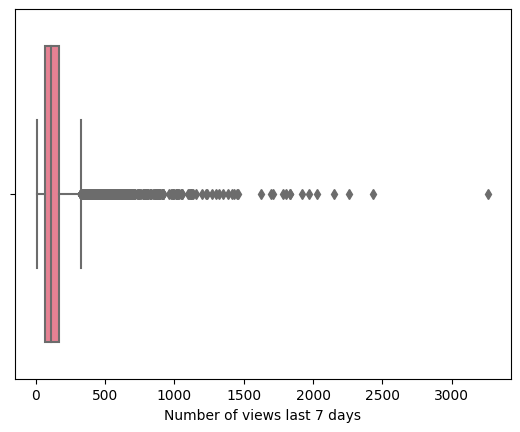

In [1316]:
#The box plot will give us a quick overview on the views
sns.boxplot(x = df['Number of views last 7 days'])
plt.show()

In [1317]:
#The first quartile
Q1 = df['Number of views last 7 days'].quantile(0.25) #70

#The Median of Views
Q2 = df['Number of views last 7 days'].quantile(0.50) #108

#The third quartile
Q3 = df['Number of views last 7 days'].quantile(0.75) #172

#The Upper Limit
UL = Q3 + 1.5 * stats.iqr(df['Number of views last 7 days'])

#the Lower Limit
LL = Q1 - 1.5 * stats.iqr(df['Number of views last 7 days'])

#The Mean of Views
MeanOfViews = np.mean(df['Number of views last 7 days']) #149.1608009708738

#The Standard Deviation of the views
STD_Of_Views = np.std(df['Number of views last 7 days']) #151.8120745514577

Using many quantiles helps in reflecting the deviation in the data

In [1318]:
print(np.quantile(df['Number of views last 7 days'], np.linspace(0, 1, 10)))

[  13.           50.           67.           81.           99.
  117.          144.          185.          269.44444444 3263.        ]


**Now we have to check for each feature that may affect the number of views**

1- The Price (Currency & Amount)

Currency
EUR    0.852549
CHF    0.099110
Â£     0.030138
DKK    0.018204
dtype: float64


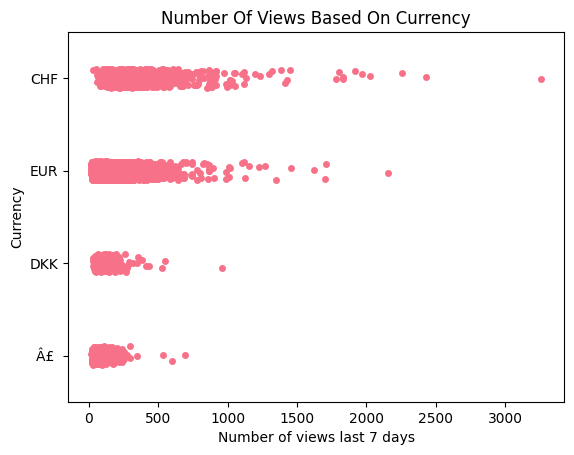

In [1319]:
print(df.value_counts('Currency', normalize = True)) #We have 4 Currencies

sns.stripplot(y = 'Currency', x = 'Number of views last 7 days', data = df)
plt.title('Number Of Views Based On Currency')
plt.show()

EUR & CHF are the most prefered currencies to deal with boats

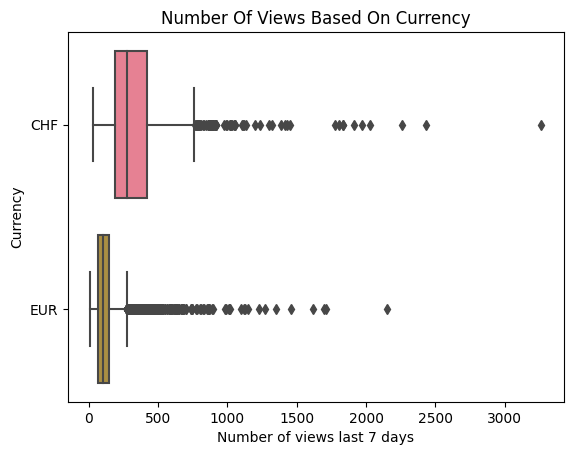

In [1320]:
sns.boxplot(y = 'Currency', x = 'Number of views last 7 days', data = df[df['Currency'].isin(['EUR', 'CHF'])])
plt.title('Number Of Views Based On Currency')
plt.show()

About 85% of prices are in Euros, and about 10% are in CHF.

The Boats offered with CHF Currency gets much more views than the EUR Currency!

2- Now lets Check for The amount of each currency

In [1321]:
Eur = df[df['Currency'] == 'EUR']
Chf = df[df['Currency'] == 'CHF']

topEur = Eur[Eur['Number of views last 7 days'] >= UL]
topChf = Chf[Chf['Number of views last 7 days'] >= UL]

In [1322]:
print(Eur['Price'].corr(Eur['Number of views last 7 days'])) #0.04 (No Relationship)
print(Chf['Price'].corr(Chf['Number of views last 7 days'])) #-0.04 (No Relationship)

0.03586747652562276
-0.04185783407368375


In [1323]:
# Unifying Currencies to EUR
df[df['Currency'] == 'CHF'].loc[:, 'Price']*=0.98
df[df['Currency'] == 'DKK'].loc[:, 'Price']*=7.45
df[df['Currency'] == 'Â£'].loc[:, 'Price']*=34.13

<ipython-input-1323-1157d2dfe989>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[df['Currency'] == 'CHF'].loc[:, 'Price']*=0.98
<ipython-input-1323-1157d2dfe989>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[df['Currency'] == 'DKK'].loc[:, 'Price']*=7.45


3- Now it's time for the 'Boat Type'

In [1324]:
topBoatTypes = df[df['Number of views last 7 days'] >= UL ][['Number of views last 7 days', 'Boat Type']].groupby('Boat Type', as_index=False).agg(sum).sort_values('Number of views last 7 days', ascending = False).iloc[:20]
print(topBoatTypes)

                                  Boat Type  Number of views last 7 days
72                               Sport Boat                        82133
61                              Motor Yacht                        65444
8                                Cabin Boat                        55021
77                       Wakeboard/Wakesurf                        16187
67                               Pilothouse                        14731
49                                Flybridge                        14617
52                                  Hardtop                        14279
0                                  Bowrider                        12044
44                             Fishing Boat                        10170
38                         Classic,Runabout                         9731
32                                  Classic                         7618
56                               House Boat                         7140
66                            Offshore Boat        

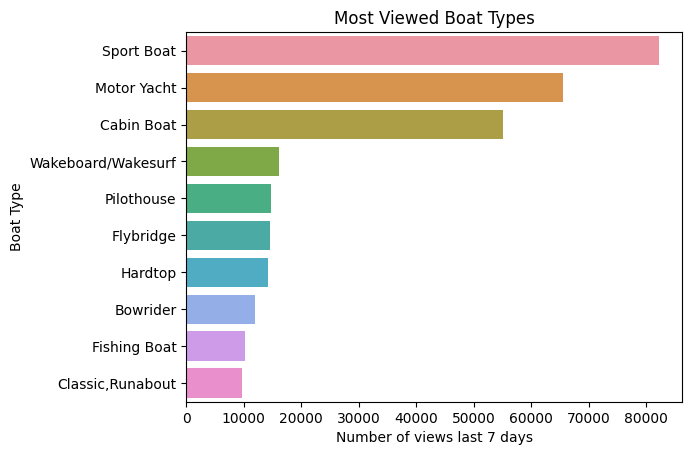

In [1325]:
sns.barplot(y = 'Boat Type', x = 'Number of views last 7 days', data = topBoatTypes.iloc[:10 , : ])
plt.title('Most Viewed Boat Types')
plt.show()

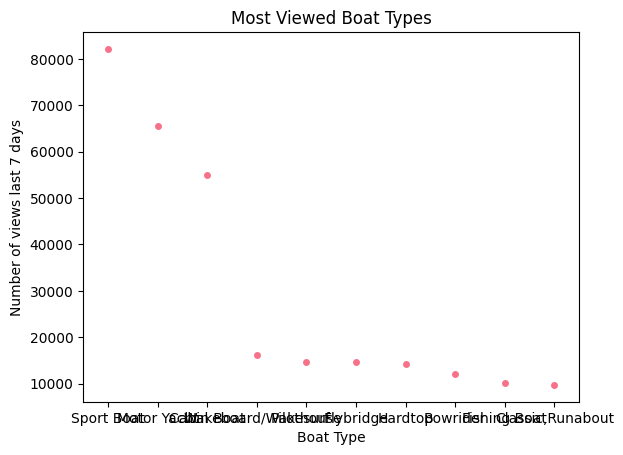

In [1326]:
sns.stripplot(x = 'Boat Type', y = 'Number of views last 7 days', data = topBoatTypes.iloc[:10 , : ])
plt.title('Most Viewed Boat Types')
plt.show()

The top 3 boat types are 'Sport Boat', 'Motor Yacht', 'Cabin Boat'

In [1327]:
print(df[df['Boat Type'].isin(topBoatTypes['Boat Type'])]['Boat Type'].value_counts(normalize=True))

Motor Yacht                                0.300885
Sport Boat                                 0.155642
Flybridge                                  0.132080
Trawler                                    0.075111
Pilothouse                                 0.067810
Cabin Boat                                 0.064712
Hardtop                                    0.056084
Bowrider                                   0.033296
Deck Boat                                  0.031305
Fishing Boat                               0.019137
House Boat                                 0.016040
Mega Yacht                                 0.011947
Runabout                                   0.008075
Classic                                    0.006527
Classic,Runabout                           0.006527
Wakeboard/Wakesurf                         0.006416
Offshore Boat                              0.005973
Cabin Boat,Motor Yacht                     0.001106
Motor Yacht,Sport Boat                     0.000996
Sport Boat,W

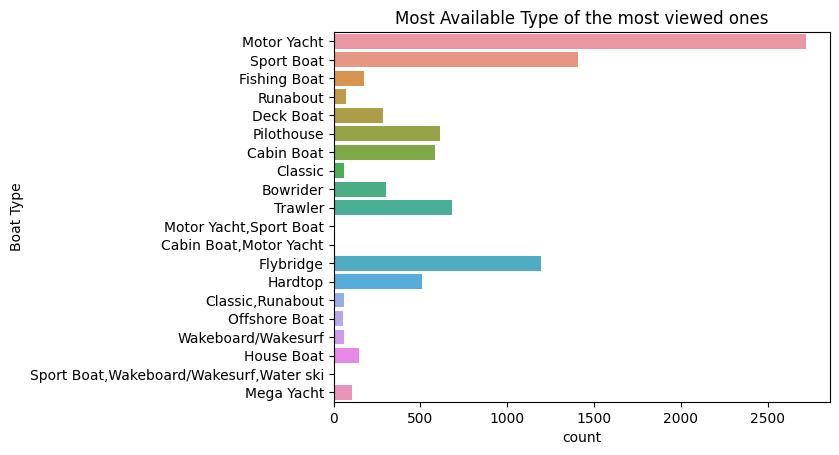

In [1328]:
sns.countplot(y ='Boat Type', data= df[df['Boat Type'].isin(topBoatTypes['Boat Type'])] )
plt.title('Most Available Type of the most viewed ones')
plt.show()

The Most available types of the top 10 viewed are 'Used boat,Diesel', 'Used boat,Unleaded', 'Used boat', 'new boat from stock,Unleaded'

4- Now it's time for the 'Manufacturer'

In [1329]:
topManufacturers = df[df['Number of views last 7 days'] >= UL ][['Number of views last 7 days', 'Manufacturer']].groupby('Manufacturer', as_index=False).agg(sum).sort_values('Number of views last 7 days', ascending = False).iloc[:20]
print(topManufacturers)  

                  Manufacturer  Number of views last 7 days
186        Sea Ray power boats                        19614
25        Bayliner power boats                        15371
233          Windy power boats                        14491
207      Sunseeker power boats                        12387
160       Princess power boats                        11020
24         Bavaria power boats                        10482
34          Boesch power boats                         9803
59         Cranchi power boats                         8769
165          Regal power boats                         8607
127    MasterCraft power boats                         7778
171           Riva power boats                         7646
110       Jeanneau power boats                         6956
69           Draco power boats                         6774
88       Frauscher power boats                         6467
220  Tullio Abbate power boats                         6299
121         Malibu power boats          

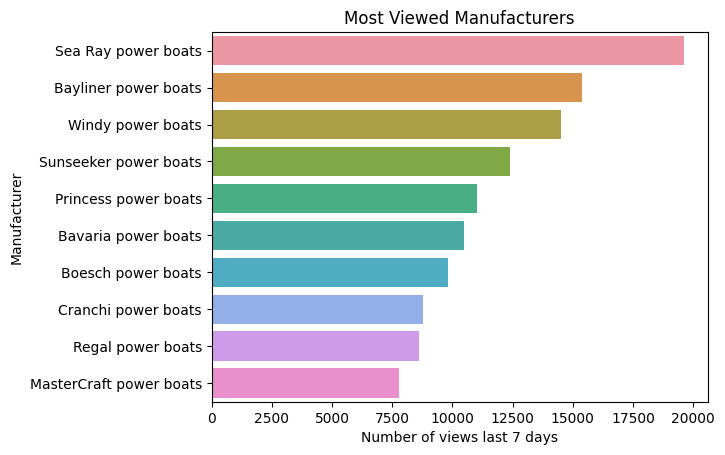

In [1330]:
sns.barplot(y = 'Manufacturer', x = 'Number of views last 7 days', data = topManufacturers.iloc[:10 , : ])
plt.title('Most Viewed Manufacturers')
plt.show()

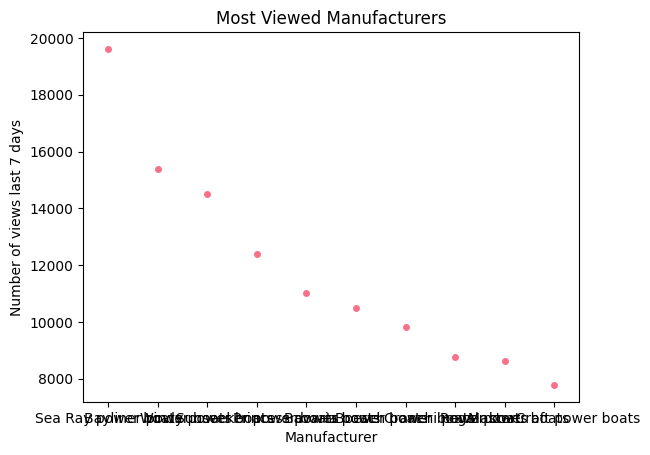

In [1331]:
sns.stripplot(x = 'Manufacturer', y = 'Number of views last 7 days', data = topManufacturers.iloc[:10 , : ])
plt.title('Most Viewed Manufacturers')
plt.show()

Sea Ray power boats  is the most viewed manufacturer

In [1332]:
print(df[df['Manufacturer'].isin(topManufacturers['Manufacturer'])]['Manufacturer'].value_counts())

BÃ©nÃ©teau power boats       631
Jeanneau power boats         537
Sunseeker power boats        383
Princess power boats         241
Sea Ray power boats          239
Cranchi power boats          219
Bavaria power boats          185
Fairline power boats         172
Bayliner power boats         142
Galeon power boats            94
Regal power boats             90
Riva power boats              77
Windy power boats             64
Boesch power boats            55
Fjord power boats             34
MasterCraft power boats       25
Frauscher power boats         25
Draco power boats             24
Tullio Abbate power boats     15
Malibu power boats            10
Name: Manufacturer, dtype: int64


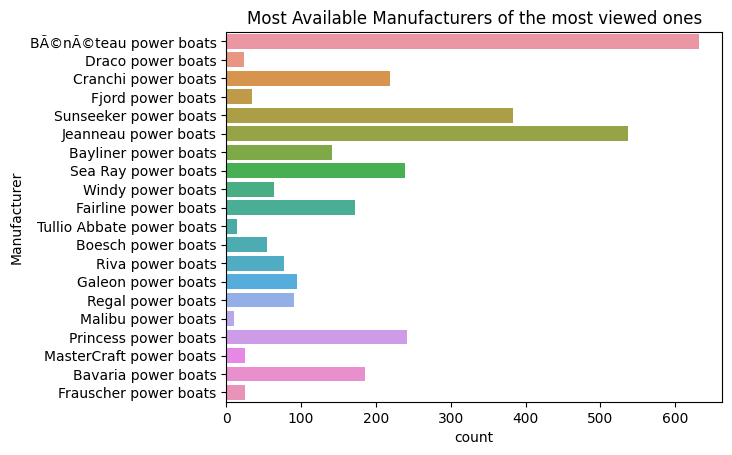

In [1333]:
sns.countplot(y ='Manufacturer', data= df[df['Manufacturer'].isin(topManufacturers['Manufacturer'])] )
plt.title('Most Available Manufacturers of the most viewed ones')
plt.show()

BÃ©nÃ©teau power boats is the most available boat of the top 20 viewed boats

5- Now it's time for the 'Type'

In [1334]:
topTypes = df[df['Number of views last 7 days'] >= UL ][['Number of views last 7 days', 'Type']].groupby('Type', as_index=False).agg(sum).sort_values('Number of views last 7 days', ascending = False).iloc[:20]
print(topTypes)

                            Type  Number of views last 7 days
9             Used boat,Unleaded                       213556
6               Used boat,Diesel                       116960
5                      Used boat                        26317
14  new boat from stock,Unleaded                        16219
10           new boat from stock                         7939
11    new boat from stock,Diesel                         7093
15             new boat on order                         3245
3         Display Model,Unleaded                         3036
16      new boat on order,Diesel                         2805
2           Display Model,Diesel                         1700
1                  Display Model                         1579
17    new boat on order,Unleaded                         1347
7             Used boat,Electric                         1139
12  new boat from stock,Electric                          731
4                       Unleaded                          701
8       

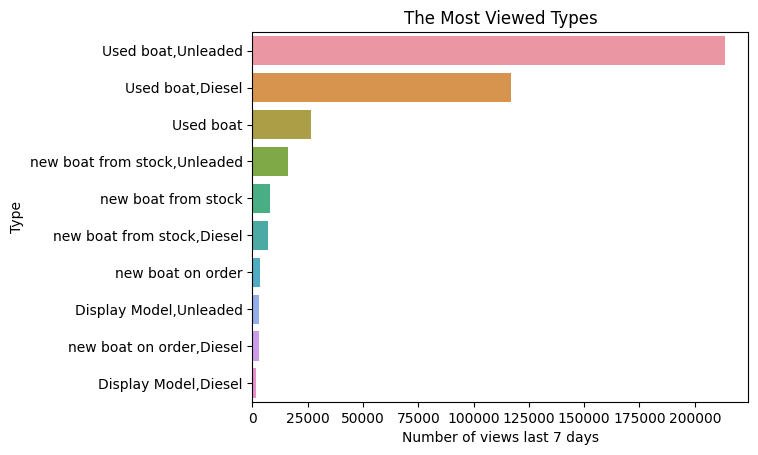

In [1335]:
sns.barplot(y = 'Type', x = 'Number of views last 7 days', data = topTypes.iloc[:10 , : ])
plt.title('The Most Viewed Types')
plt.show()

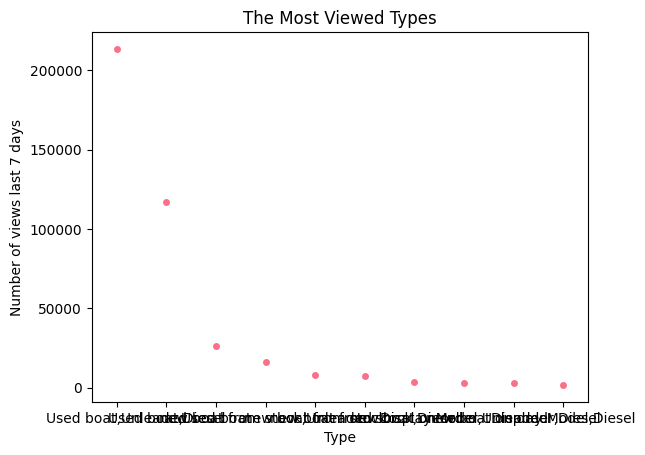

In [1336]:
sns.stripplot(x = 'Type', y = 'Number of views last 7 days', data = topTypes.iloc[:10 , : ])
plt.title('The Most Viewed Types')
plt.show()

We have 18 types of boats, the top 2 are 'Used boat,Unleaded' and 'Used boat,Diesel'

In [1337]:
print(df[df['Type'].isin(topTypes['Type'])]['Type'].value_counts())

Used boat,Diesel                4140
Used boat,Unleaded              1686
Used boat                       1462
new boat from stock,Unleaded    1107
new boat from stock              665
new boat from stock,Diesel       291
new boat on order,Unleaded       150
Display Model,Unleaded            75
new boat on order,Diesel          61
new boat on order                 61
Diesel                            57
Used boat,Electric                27
Unleaded                          22
Display Model,Diesel              19
Display Model                     18
new boat from stock,Electric      18
Used boat,Gas                     10
new boat from stock,Hybrid         1
Name: Type, dtype: int64


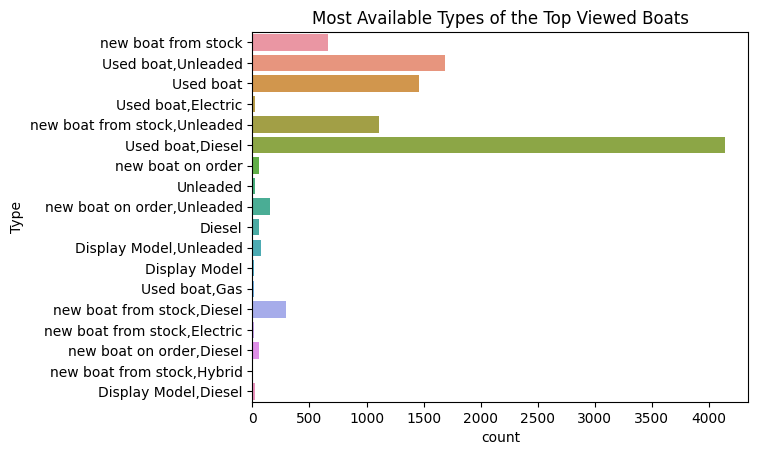

In [1338]:
sns.countplot(y ='Type', data= df[df['Type'].isin(topTypes['Type'])] )
plt.title('Most Available Types of the Top Viewed Boats')
plt.show()

The Most available types of the top 10 viewed are 'Used boat,Diesel', 'Used boat,Unleaded', 'Used boat', 'new boat from stock,Unleaded'

6 Now it's time for the 'Material'

In [1339]:
topMaterials = df[df['Number of views last 7 days'] >= UL ][['Number of views last 7 days', 'Material']].groupby('Material', as_index=False).agg(sum).sort_values('Number of views last 7 days', ascending = False).iloc[:20]
print(topMaterials)

        Material  Number of views last 7 days
2            GRP                       282889
4        Plastic                        32896
5          Steel                        25095
7           Wood                        23077
0      Aluminium                         8423
1   Carbon Fiber                         4873
3            PVC                         1802
6  Thermoplastic                         1715


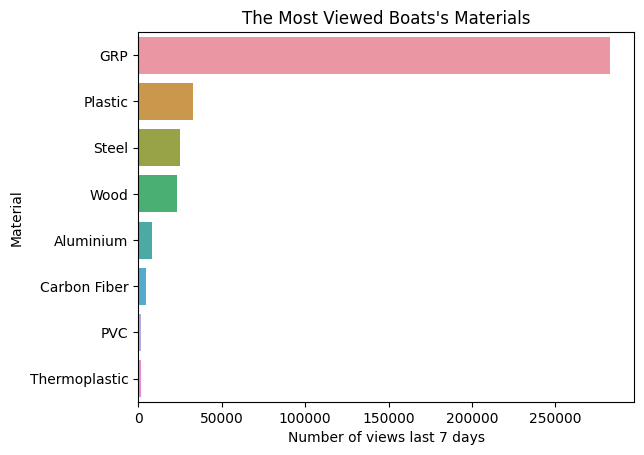

In [1340]:
sns.barplot(y = 'Material', x = 'Number of views last 7 days', data = topMaterials.iloc[:10 , : ])
plt.title("The Most Viewed Boats's Materials")
plt.show()

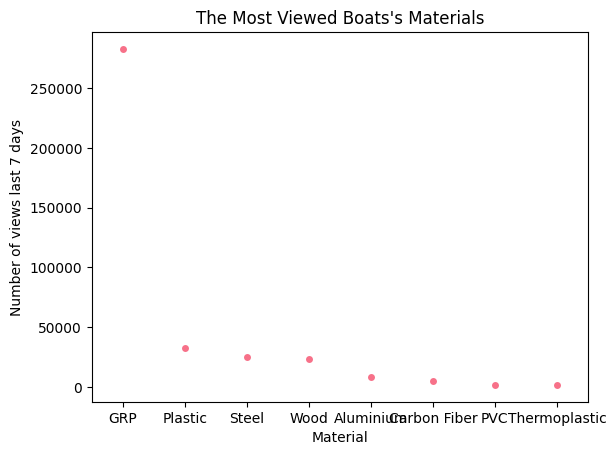

In [1341]:
sns.stripplot(x = 'Material', y = 'Number of views last 7 days', data = topMaterials.iloc[:10 , : ])
plt.title("The Most Viewed Boats's Materials")
plt.show()

We have 8 Materials for boats, the top one of them is 'GRP'

In [1342]:
print(df[df['Material'].isin(topMaterials['Material'])]['Material'].value_counts())

GRP              5484
PVC              1123
Steel             939
Wood              235
Aluminium         229
Plastic            77
Carbon Fiber       30
Thermoplastic      15
Name: Material, dtype: int64


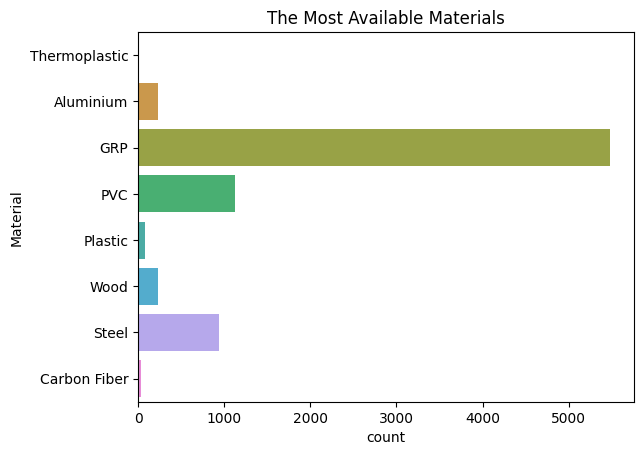

In [1343]:
sns.countplot(y ='Material', data= df[df['Material'].isin(topMaterials['Material'])] )
plt.title('The Most Available Materials')
plt.show()

The Most available Material is also 'GRP'

7 Now it's time for the 'Location'

In [1344]:
topLocations = df[df['Number of views last 7 days'] >= UL ][['Number of views last 7 days', 'Location']].groupby('Location', as_index=False).agg(sum).sort_values('Number of views last 7 days', ascending = False).iloc[:20]
print(topLocations)

       Location  Number of views last 7 days
45  Switzerland                       227653
18      Germany                        59637
22        Italy                        24716
10      Croatia                        10631
41        Spain                         9107
26         Lake                         8630
29  Netherlands                         8302
16       France                         8266
2       Austria                         5554
12      Denmark                         3341
5       Belgium                         2780
34     Portugal                         2295
33       Poland                         2277
30     Neustadt                         2154
49         Thun                         1831
50  TravemÃ¼nde                         1825
25         Lago                         1769
51       United                         1544
11        Czech                         1535
13        Donau                         1206


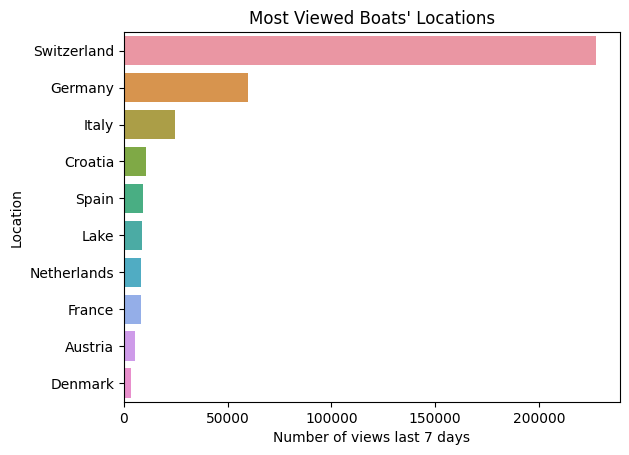

In [1345]:
sns.barplot(y = 'Location', x = 'Number of views last 7 days', data = topLocations.iloc[:10 , : ])
plt.title("Most Viewed Boats' Locations")
plt.show()

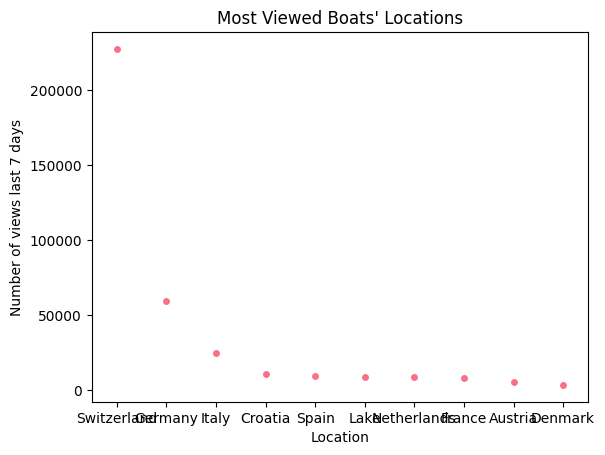

In [1346]:
sns.stripplot(x = 'Location', y = 'Number of views last 7 days', data = topLocations.iloc[:10 , : ])
plt.title("Most Viewed Boats' Locations")
plt.show()

The top Location of them is 'Switzerland'

In [1347]:
print(df[df['Location'].isin(topLocations['Location'])]['Location'].value_counts())

Germany        1914
Italy          1793
France         1229
Switzerland    1112
Netherlands    1056
Croatia         811
Spain           702
United          238
Denmark         172
Portugal        135
Austria          88
Belgium          62
Poland           41
Lake             16
Czech             5
Donau             4
Lago              3
TravemÃ¼nde       2
Neustadt          1
Thun              1
Name: Location, dtype: int64


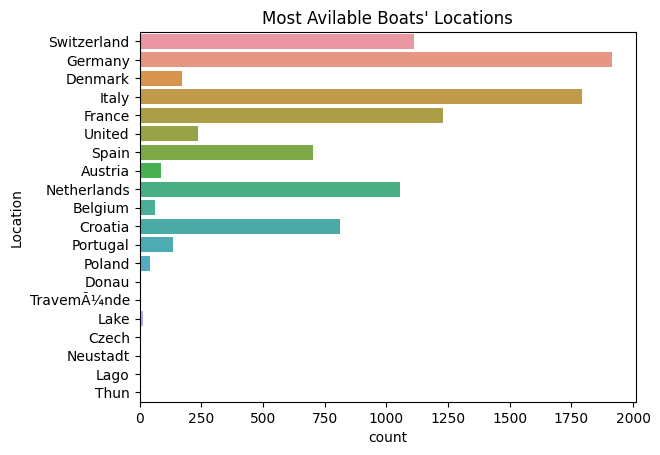

In [1348]:
sns.countplot(y ='Location', data= df[df['Location'].isin(topLocations['Location'])] )
plt.title("Most Avilable Boats' Locations")
plt.show()

The Most boats are in 'Germany'

8- Now it's time for the 'Year Built'

In [1349]:
topYears = df[(df['Number of views last 7 days'] >= UL) & (df['Year Built'] != 0)][['Number of views last 7 days', 'Year Built']].groupby('Year Built', as_index=False).agg(sum).sort_values('Number of views last 7 days', ascending = False).iloc[:20]
print(topYears)

    Year Built  Number of views last 7 days
73        2020                        30497
72        2019                        16517
59        2006                        15311
45        1992                        14907
44        1991                        12375
43        1990                        12374
49        1996                        11189
48        1995                        11060
58        2005                        11007
42        1989                        10694
33        1980                        10573
57        2004                         9441
56        2003                         8789
47        1994                         8645
60        2007                         8552
70        2017                         8441
67        2014                         8398
69        2016                         8318
54        2001                         8113
52        1999                         8074


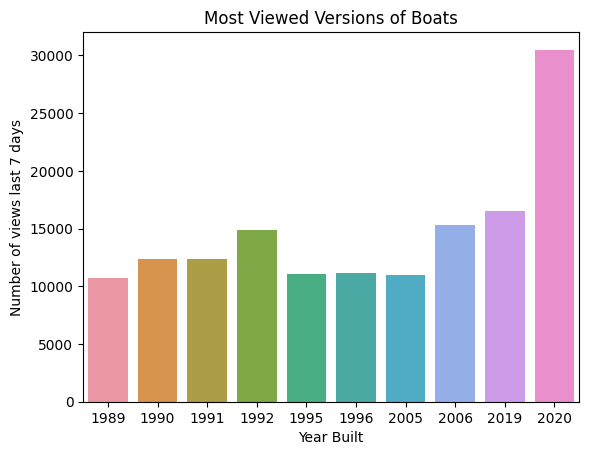

In [1350]:
sns.barplot(x = 'Year Built', y = 'Number of views last 7 days', data = topYears.iloc[:10 , : ])
plt.title('Most Viewed Versions of Boats')
plt.show()

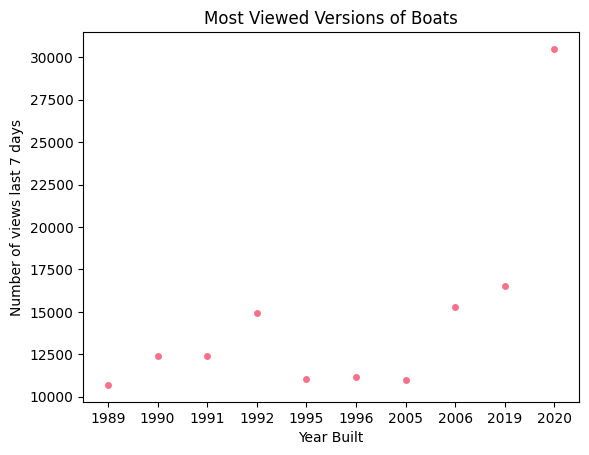

In [1351]:
sns.stripplot(x = 'Year Built', y = 'Number of views last 7 days', data = topYears.iloc[:10 , : ])
plt.title('Most Viewed Versions of Boats')
plt.show()

The top Years are '2020', '2019', '2006' 

In [1352]:
print(df[df['Year Built'].isin(topYears['Year Built'])]['Year Built'].value_counts())

2020    1279
2019     663
2007     393
2006     393
2017     314
2005     307
2004     270
2016     227
2003     226
2001     202
2014     168
1996     147
1999     144
1995     138
1992     135
1991     130
1990     120
1994     113
1989      86
1980      69
Name: Year Built, dtype: int64


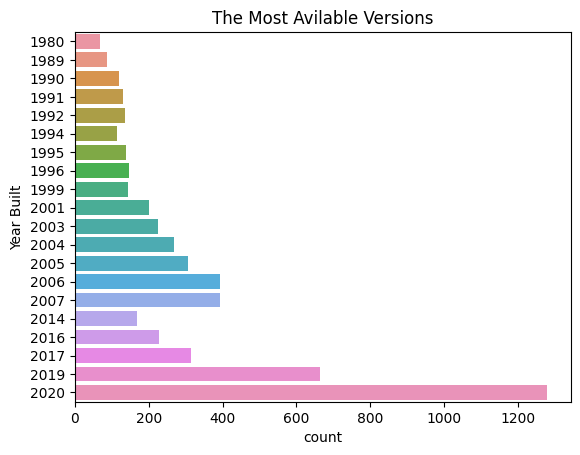

In [1353]:
sns.countplot(y ='Year Built', data= df[df['Year Built'].isin(topYears['Year Built'])] )
plt.title('The Most Avilable Versions')
plt.show()


The Most available boats are built in '2020'

9- The Dimensions of the boat ('Length', 'Width')

In [1354]:
topArea = df[(df['Number of views last 7 days'] >= UL)][['Number of views last 7 days', 'Area']].groupby('Area', as_index=False).agg(sum).sort_values('Number of views last 7 days', ascending = False).iloc[:20]
print(topArea)

         Area  Number of views last 7 days
271   18.9420                         3263
418   27.8369                         2454
554   43.1456                         2432
281   19.4250                         2430
263   18.7500                         2318
553   42.9780                         2261
641  105.5600                         2154
290   19.9390                         2151
481   33.0000                         2101
611   61.9920                         2099
115   14.3676                         2026
187   16.2500                         1996
156   15.2950                         1970
197   16.7500                         1964
75    12.6000                         1917
129   14.7840                         1834
185   16.1840                         1831
149   15.1900                         1804
177   15.9250                         1797
588   52.0740                         1780


In [1355]:
print(df[(df['Area'] >= 10) & (df['Area'] <= 110)]['Area'].value_counts(sort= True, ascending=True))

73.3855      1
41.4909      1
39.3515      1
57.8140      1
13.6400      1
55.9797      1
53.0700      1
52.3640      1
23.7800      1
67.4250      1
21.5730      1
45.4212      1
65.6040      1
45.0432      1
62.5220      1
49.3535      1
61.6880      1
46.4464      1
37.8700      1
55.2976      1
52.5350      1
35.8956      1
17.0400      1
61.1728      1
38.8594      1
81.5500      1
70.3120      1
57.1200      1
94.6740      1
55.4700      1
43.3188      1
27.8784      1
54.4185      1
45.0450      1
72.7500      1
41.8066      1
58.5000      1
96.9900      1
75.5200      1
23.5800      1
29.7505      1
45.2628      1
84.2460      1
57.2005      1
56.7850      1
32.9340      1
77.6912      1
71.4000      1
55.7856      1
58.2855      1
31.0960      1
43.9824      1
53.5920      1
42.7810      1
29.6703      1
58.9425      1
32.4500      1
32.9100      1
64.0900      1
53.3000      1
78.0450      1
70.4700      1
50.9936      1
24.7036      1
48.4000      1
32.3945      1
60.0250   

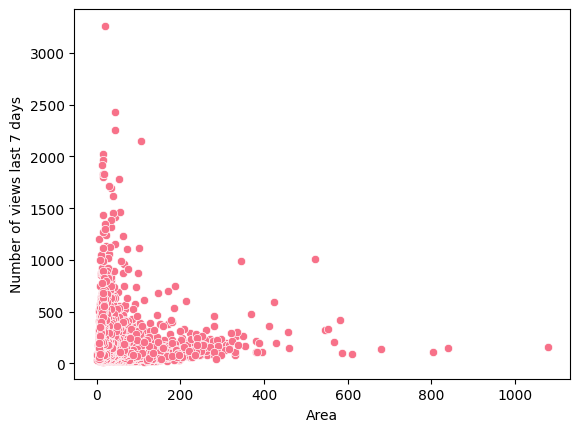

In [1356]:
sns.scatterplot(x ='Area', y = 'Number of views last 7 days',  data= df )
plt.show()

The most viewed boats have an area between 10, 110

The most avilable boats'Areas with high numbers of views are between 12, 17

9.1 for Length Only

In [1357]:
print(df['Length'].corr(df['Number of views last 7 days'])) #Weak Realashionship

-0.13501123164811235


In [1358]:
topLength = df[(df['Number of views last 7 days'] >= UL)][['Number of views last 7 days', 'Length']].groupby('Length', as_index=False).agg(sum).sort_values('Number of views last 7 days', ascending = False).iloc[:100]
print(topLength)

     Length  Number of views last 7 days
79     6.50                         7960
76     6.40                         7016
129    7.50                         6770
227   10.00                         5929
138    7.70                         5854
54     6.00                         5070
191    9.00                         4993
274   12.00                         4692
114    7.20                         4660
104    7.00                         4580
177    8.60                         4546
67     6.20                         4325
263   11.70                         4310
84     6.60                         4032
172    8.50                         3990
49     5.90                         3975
61     6.10                         3961
144    7.85                         3915
38     5.60                         3761
92     6.80                         3631
202    9.30                         3573
134    7.60                         3476
47     5.80                         3437
87     6.70     

In [1359]:
print(df[(df['Length'] >= 5) & (df['Length'] <= 13)]['Length'].value_counts(sort= True, ascending=True))

6.62       1
10.09      1
11.07      1
8.58       1
6.63       1
12.44      1
12.76      1
7.06       1
11.67      1
11.13      1
9.56       1
12.22      1
5.77       1
9.24       1
11.06      1
10.88      1
6.01       1
8.54       1
10.12      1
9.09       1
8.63       1
9.61       1
12.72      1
6.69       1
12.11      1
8.02       1
10.69      1
10.93      1
7.24       1
9.26       1
12.37      1
11.69      1
9.17       1
9.11       1
8.98       1
12.52      1
12.54      1
11.09      1
12.03      1
10.68      1
10.42      1
7.97       1
6.26       1
12.14      1
12.94      1
9.67       1
12.59      1
11.36      1
10.65      1
8.83       1
5.38       1
8.28       1
6.89       1
12.77      1
10.66      1
5.67       1
10.33      1
9.51       1
11.48      1
12.02      1
12.63      1
12.28      1
12.68      1
12.71      1
5.42       1
12.43      1
7.53       1
12.21      1
11.94      1
11.32      1
10.01      1
9.53       1
8.87       1
6.87       1
11.21      1
10.77      1
9.33       1

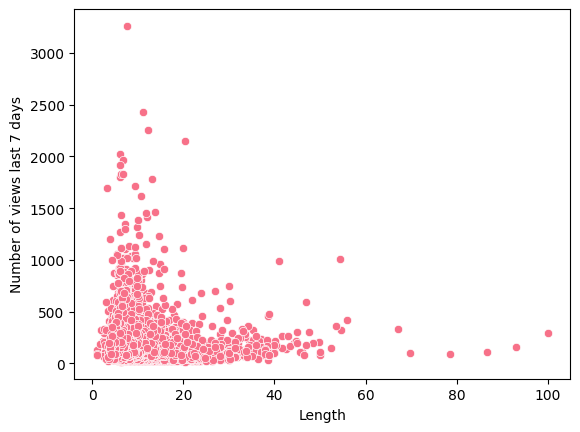

In [1360]:
sns.scatterplot(x ='Length', y = 'Number of views last 7 days',  data= df )
plt.show()

The most viewed boats have a Length between 2, 21

The most avilable boats'Lengths with high numbers of views are between 5, 12

9.2 for Width Only

In [1361]:
print(df['Width'].corr(df['Number of views last 7 days'])) #Weak Realashionship

-0.1575469235235658


In [1362]:
topWidth = df[(df['Number of views last 7 days'] >= UL)][['Number of views last 7 days', 'Width']].groupby('Width', as_index=False).agg(sum).sort_values('Number of views last 7 days', ascending = False).iloc[:100]
print(topWidth)

     Width  Number of views last 7 days
65    2.50                        24953
74    2.59                        22432
70    2.55                        10170
102   3.00                         9447
35    2.20                         9129
69    2.54                         8588
60    2.45                         7266
111   3.20                         7239
45    2.30                         7179
75    2.60                         6739
133   3.50                         6272
61    2.46                         5937
64    2.49                         5870
28    2.10                         5842
119   3.30                         5483
49    2.34                         5094
86    2.80                         5090
135   3.60                         5014
100   2.98                         4993
81    2.70                         4494
128   3.45                         4453
93    2.90                         4401
51    2.36                         3933
43    2.28                         3881


In [1363]:
print(df[(df['Width'] >= 1) & (df['Width'] <= 10)]['Width'].value_counts(sort= True, ascending=True))

1.89       1
5.59       1
6.88       1
6.51       1
6.74       1
5.57       1
7.59       1
8.99       1
5.42       1
6.52       1
9.98       1
8.44       1
5.76       1
4.69       1
7.90       1
1.12       1
5.62       1
1.51       1
7.64       1
5.87       1
5.88       1
9.95       1
6.68       1
2.01       1
1.94       1
6.03       1
7.27       1
5.66       1
2.61       1
5.92       1
9.90       1
9.20       1
5.53       1
6.33       1
7.65       1
6.32       1
5.01       1
5.89       1
7.75       1
5.58       1
5.81       1
7.83       1
8.25       1
8.09       1
7.54       1
8.14       1
7.43       1
7.44       1
8.80       1
6.92       1
6.95       1
7.47       1
7.16       1
8.40       1
7.39       1
6.65       1
7.03       1
7.07       1
8.10       1
10.00      1
8.57       1
7.22       1
6.44       1
5.82       1
7.45       1
6.28       1
6.57       1
6.93       1
6.73       1
6.64       1
5.29       1
6.85       1
7.53       1
7.25       1
7.08       1
7.05       1
7.01       1

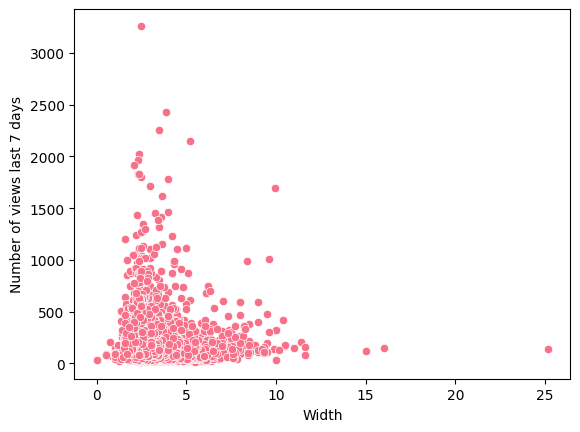

In [1364]:
sns.scatterplot(x ='Width', y = 'Number of views last 7 days',  data= df )
plt.show()

The most viewed boats have a Length between 1, 10

The most avilable boats'Lengths with high numbers of views are between 1, 8

Area related to boat type

In [1365]:
AreaForType = df[df['Boat Type'].isin(topBoatTypes['Boat Type'])][['Boat Type', 'Area']]
AreaRangesPerType = AreaForType.groupby('Boat Type')['Area'].agg([min, max])

print(AreaRangesPerType)

                                             min       max
Boat Type                                                 
Bowrider                                  4.0120   41.2048
Cabin Boat                                5.8608   84.9150
Cabin Boat,Motor Yacht                   16.3500   42.1800
Classic                                   6.1500   89.6700
Classic,Runabout                          6.4000   32.8900
Deck Boat                                 4.0000   91.0440
Fishing Boat                              4.9476  108.6500
Flybridge                                12.0000  840.0000
Hardtop                                  13.3705  172.9350
House Boat                               17.5000  238.3028
Mega Yacht                               27.4500  582.4000
Motor Yacht                               0.1280  411.9500
Motor Yacht,Sport Boat                   14.4000   55.4260
Offshore Boat                            14.2500   94.5000
Pilothouse                                2.0726   82.00

In [1366]:
df.dtypes

Price                          float64
Boat Type                       object
Manufacturer                    object
Type                            object
Year Built                       int64
Length                         float64
Width                          float64
Material                        object
Location                        object
Number of views last 7 days      int64
Currency                        object
Area                           float64
dtype: object

In [1367]:
df.isna().sum()

Price                             0
Boat Type                         0
Manufacturer                   1338
Type                              6
Year Built                        0
Length                            9
Width                            56
Material                       1749
Location                         36
Number of views last 7 days       0
Currency                          0
Area                             56
dtype: int64

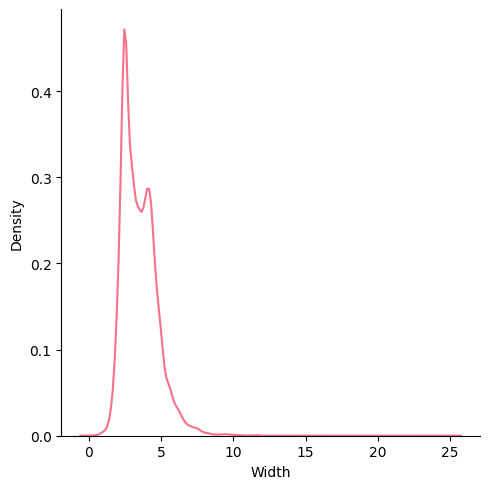

In [1368]:
sns.set_palette("husl")
sns.displot(data=df, x="Width", kind="kde")

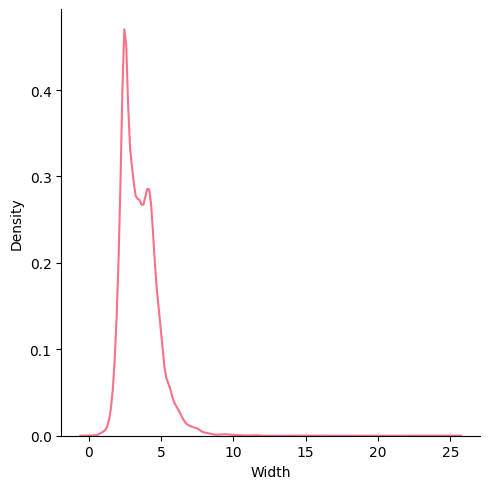

In [1369]:
sns.set_palette("husl")
sns.displot(df['Width'].fillna(df['Width'].mean(), inplace=False), kind="kde")

In [1370]:
df['Width'].fillna(df['Width'].mean(), inplace=True)

In [1371]:
df['Area'] = df['Length'] * df['Width']

In [1372]:
df.isna().sum()

Price                             0
Boat Type                         0
Manufacturer                   1338
Type                              6
Year Built                        0
Length                            9
Width                             0
Material                       1749
Location                         36
Number of views last 7 days       0
Currency                          0
Area                              9
dtype: int64

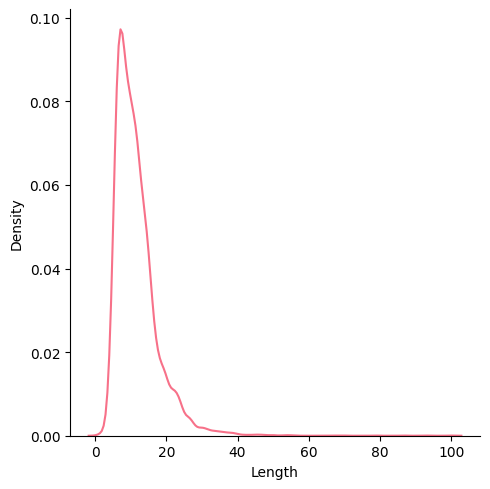

In [1373]:
sns.set_palette("husl")
sns.displot(data=df, x="Length", kind="kde")

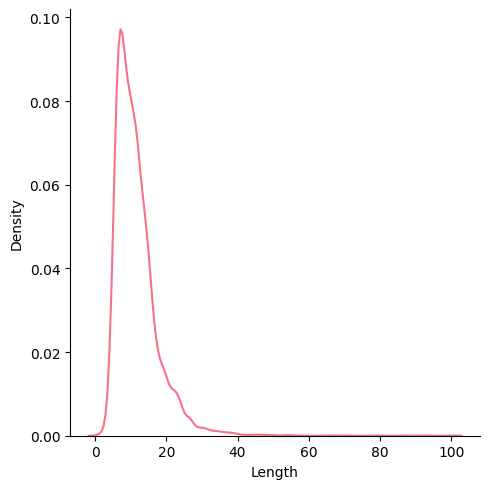

In [1374]:
sns.set_palette("husl")
sns.displot(df['Length'].fillna(df['Length'].mean(), inplace=False), kind="kde")

In [1375]:
df['Length'].fillna(df['Length'].mean(), inplace=True)

In [1376]:
df['Area'] = df['Length'] * df['Width']

In [1377]:
df.isna().sum()

Price                             0
Boat Type                         0
Manufacturer                   1338
Type                              6
Year Built                        0
Length                            0
Width                             0
Material                       1749
Location                         36
Number of views last 7 days       0
Currency                          0
Area                              0
dtype: int64

In [1378]:
df.drop(columns=['Area'], inplace=True)

In [1379]:
df.dtypes

Price                          float64
Boat Type                       object
Manufacturer                    object
Type                            object
Year Built                       int64
Length                         float64
Width                          float64
Material                        object
Location                        object
Number of views last 7 days      int64
Currency                        object
dtype: object

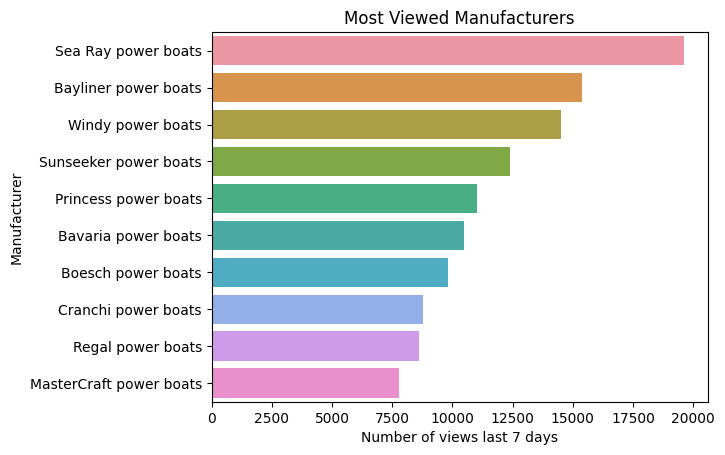

In [1380]:
topManufacturers = df[df['Number of views last 7 days'] >= UL ][['Number of views last 7 days', 'Manufacturer']].groupby('Manufacturer', as_index=False).agg(sum).sort_values('Number of views last 7 days', ascending = False).iloc[:20]
sns.barplot(y = 'Manufacturer', x = 'Number of views last 7 days', data = topManufacturers.iloc[:10 , : ])
plt.title('Most Viewed Manufacturers')
plt.show()

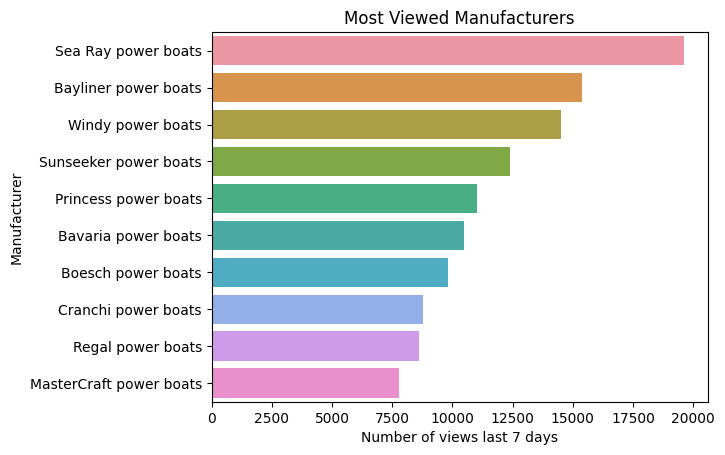

In [1381]:
sns.barplot(y = 'Manufacturer', x = 'Number of views last 7 days', data = topManufacturers.iloc[:10 , : ].fillna(df['Manufacturer'].mode()))
plt.title('Most Viewed Manufacturers')
plt.show()

In [1382]:
fill_list = df['Manufacturer'].unique()
df["Manufacturer"] = df["Manufacturer"].fillna(pd.Series(np.random.choice(fill_list , size = len(df.index) + 2)))

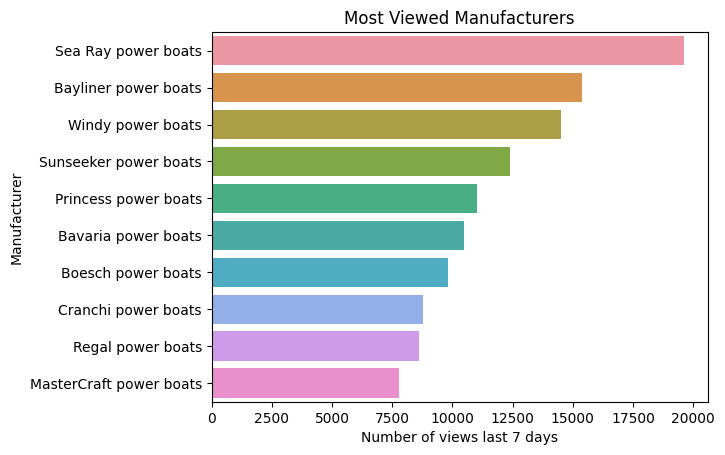

In [1383]:
sns.barplot(y = 'Manufacturer', x = 'Number of views last 7 days', data = topManufacturers.iloc[:10 , : ])
plt.title('Most Viewed Manufacturers')
plt.show()

In [1384]:
df.isna().sum()

Price                             0
Boat Type                         0
Manufacturer                      1
Type                              6
Year Built                        0
Length                            0
Width                             0
Material                       1749
Location                         36
Number of views last 7 days       0
Currency                          0
dtype: int64

In [1385]:
df = df[df['Type'].notna()]
df.isna().sum()

Price                             0
Boat Type                         0
Manufacturer                      1
Type                              0
Year Built                        0
Length                            0
Width                             0
Material                       1744
Location                         36
Number of views last 7 days       0
Currency                          0
dtype: int64

In [1386]:
df = df[df['Location'].notna()]
df.isna().sum()

Price                             0
Boat Type                         0
Manufacturer                      1
Type                              0
Year Built                        0
Length                            0
Width                             0
Material                       1744
Location                          0
Number of views last 7 days       0
Currency                          0
dtype: int64

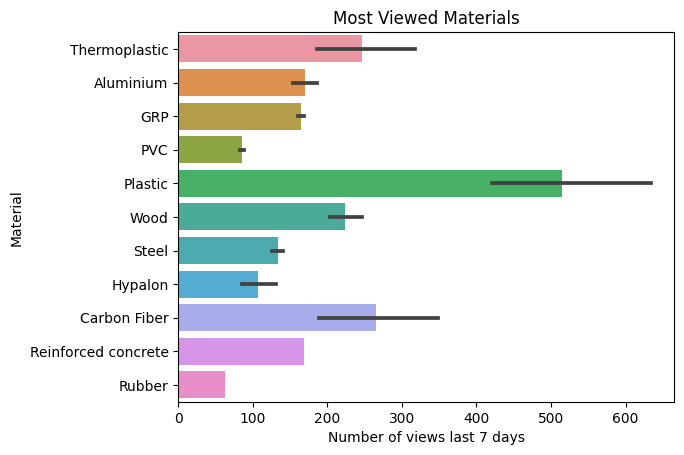

In [1387]:
sns.barplot(y = 'Material', x = 'Number of views last 7 days', data = df)
plt.title('Most Viewed Materials')
plt.show()

In [1388]:
fill_list = df['Material'].unique()
np.delete(fill_list, 0)
df["Material"] = df["Material"].fillna(pd.Series(np.random.choice(fill_list , size = len(df.index))))

In [1389]:
df.isna().sum()

Price                            0
Boat Type                        0
Manufacturer                     1
Type                             0
Year Built                       0
Length                           0
Width                            0
Material                       142
Location                         0
Number of views last 7 days      0
Currency                         0
dtype: int64

In [1390]:
df.dropna(inplace=True)

In [1391]:
df.shape

(9703, 11)

In [1392]:
df.head()

,Price,Boat Type,Manufacturer,Type,Year Built,Length,Width,Material,Location,Number of views last 7 days,Currency
0,3337.0,Motor Yacht,Rigiflex power boats,new boat from stock,2017,4.00,1.90,Steel,Switzerland,226,CHF
1,3490.0,Center console boat,Terhi power boats,new boat from stock,2020,4.00,1.50,Thermoplastic,Germany,75,EUR
2,3770.0,Sport Boat,Marine power boats,new boat from stock,0,3.69,1.42,Aluminium,Switzerland,124,CHF
3,25900.0,Sport Boat,Pioner power boats,new boat from stock,2020,3.00,1.00,Aluminium,Denmark,64,DKK
4,3399.0,Fishing Boat,Linder power boats,new boat from stock,2019,3.55,1.46,Aluminium,Germany,58,EUR


In [1393]:
# one hot encoding
df = pd.get_dummies(df, columns=['Currency', 'Manufacturer', 'Type', 'Boat Type', 'Material', 'Location'], prefix = ['Currency', 'Manufacturer', 'Type', 'Boat Type', 'Material', 'Location'])

df = df.astype('float64')

In [1394]:
x = df.drop(columns=['Number of views last 7 days'], axis=1)
y = df['Number of views last 7 days']

In [1395]:
# Data preprocessing
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x = pd.DataFrame(scaler.fit_transform(x))

In [1396]:
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.9)

In [1397]:
regressor = RandomForestRegressor(max_depth=20, random_state=0)
regressor.fit(x_train, y_train)

RandomForestRegressor(max_depth=20, random_state=0)

In [1399]:
y_pred = regressor.predict(x_test)
print(mean_squared_error(y_test, y_pred))

11630.601044332288
